# Image Analysis
## Practice 1
## Alcaraz Fraga Ricardo

### Imports


In [231]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from PIL import Image

%matplotlib inline

### Using PIL and matplotlib to display images

In [232]:
# Getting the images in the actual folder and asking the user which one to use

def ls(ruta = '.'):
    return [arch for arch in listdir(ruta) if isfile(join(ruta, arch))]

print('Images in the actual folder: ', ls())

print('Type the name of the image you want to work with: ')
pic_name = input()

Images in the actual folder:  ['grayscale_image.jpg', 'coins.png', 'IA_P1_<2018630891>.ipynb', 'header_escom26.jpg', 'peppers.png']
Type the name of the image you want to work with: 
coins.png


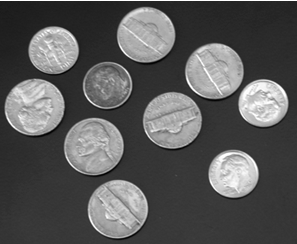

In [233]:
pic = Image.open(pic_name) #Open the image
pic #Diplays the image in the notebook

In [234]:
type(pic)

PIL.PngImagePlugin.PngImageFile

### Transforming the image to an array

In [235]:
pic_arr = np.asarray(pic)
pic_arr.shape

(244, 297, 4)

In [236]:
pic_arr.shape

(244, 297, 4)

In [237]:
pic_arr

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[ 27,  27,  27, 255],
        [ 29,  29,  29, 255],
        [ 27,  27,  27, 255],
        ...,
        [ 37,  37,  37, 255],
        [ 38,  38,  38, 255],
        [ 35,  35,  35, 255]],

       [[ 29,  29,  29, 255],
        [ 27,  27,  27, 255],
        [ 30,  30,  30, 255],
        ...,
        [ 36,  36,  36, 255],
        [ 36,  36,  36, 255],
        [ 37,  37,  37, 255]],

       ...,

       [[ 53,  53,  53, 255],
        [ 52,  52,  52, 255],
        [ 54,  54,  54, 255],
        ...,
        [ 54,  54,  54, 255],
        [ 52,  52,  52, 255],
        [ 51,  51,  51, 255]],

       [[ 54,  54,  54, 255],
        [ 53,  53,  53, 255],
        [ 51,  51,  51, 255],
        ...,
        [ 55,  55,  55, 255],
        [ 52,  52,  52, 255],
        [ 49,  49,  49, 255]],

       [[ 52

### Showing the image with matplotlib

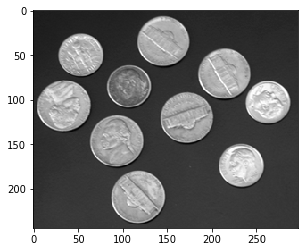

In [238]:
plt.imshow(pic_arr)

In [239]:
pic_arr.shape

(244, 297, 4)

### Defining a function to isolate the values from an image with 3 channels (RGB)

In [240]:
def obtain_values_3d(image, channel):
    pic_values = image.copy()
    
    if(channel == 'red'):
        pic_values[:,:,1]=0
        pic_values[:,:,2]=0
    
    elif(channel == 'green'):
        pic_values[:,:,0]=0
        pic_values[:,:,2]=0
    
    elif(channel == 'blue'):
        pic_values[:,:,0]=0
        pic_values[:,:,1]=0
    
    else:
        print('Invalid channel')
    
    return pic_values

### Visualizing the channels

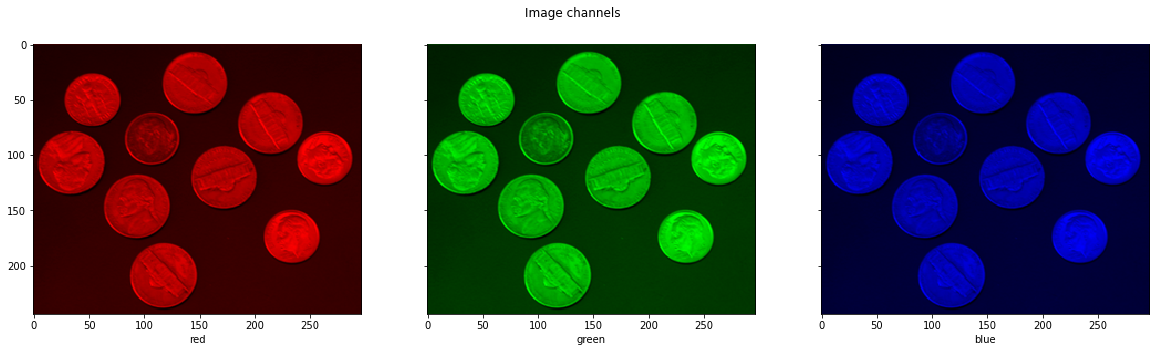

In [241]:
# If the image has 3 channels
if(len(pic_arr.shape) == 3):
    pic_red = obtain_values_3d(pic_arr, 'red')
    pic_green = obtain_values_3d(pic_arr, 'green')
    pic_blue = obtain_values_3d(pic_arr, 'blue')
    
    fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)
    axs[0].imshow(pic_red,cmap='gray')
    axs[0].set_xlabel("red")
    axs[1].imshow(pic_green,cmap='gray')
    axs[1].set_xlabel("green")
    axs[2].imshow(pic_blue,cmap='gray')
    axs[2].set_xlabel("blue")
    fig.suptitle('Image channels')
    
else:
    print('No rgb channels')

### Reshaping the arrays

In [242]:
def reshape_3darray(array, channel):
    if(channel == 'red'):
        pic_1 = array[:,:,0]
        pic_2 = pic_1.flatten()
    
    elif(channel == 'green'):
        pic_1 = array[:,:,1]
        pic_2 = pic_1.flatten()
    
    elif(channel == 'blue'):
        pic_1 = array[:,:,2]
        pic_2 = pic_1.flatten()
    
    else:
        print("Invalid channel")
    
    return pic_2

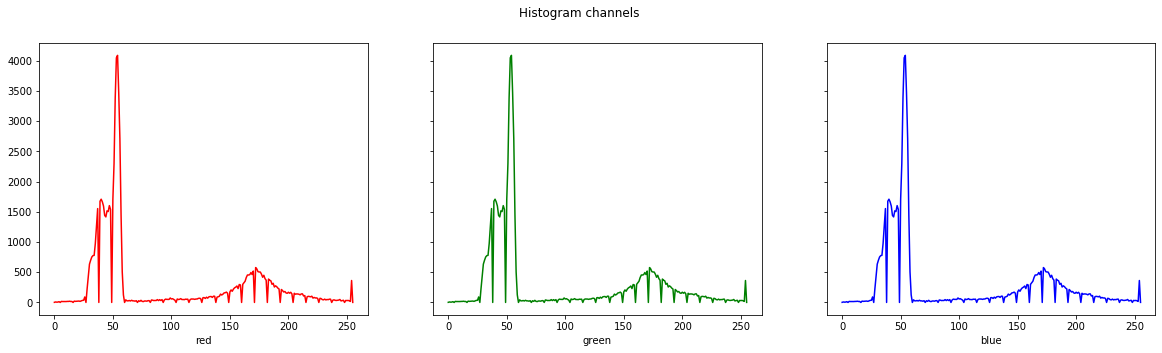

In [243]:
if(len(pic_arr.shape) == 3):
    pic_r = reshape_3darray(pic_arr, 'red')
    pic_g = reshape_3darray(pic_arr, 'green')
    pic_b = reshape_3darray(pic_arr, 'blue')
    
    #Get the height and the width
    height=pic_arr.shape[0]
    width=pic_arr.shape[1]

    #RED CHANNEL
    hist_red=np.zeros(256)

    ##CODE TO CALCULATE RED CHANNEL HISTOGRAM
    for i in range(0, len(pic_r)):
        a = pic_r[i] - 1

        hist_red[a] = hist_red[a] + 1

    #GREEN CHANNEL
    hist_green=np.zeros(256)
    
    ##CODE TO CALCULATE GREEN CHANNEL HISTOGRAM
    for i in range(0, len(pic_g)):
        a = pic_g[i] - 1

        hist_green[a] = hist_green[a] + 1


    #BLUE CHANNEL
    hist_blue=np.zeros(256)

    ##CODE TO CALCULATE BLUE CHANNEL HISTOGRAM
    for i in range(0, len(pic_b)):
        a = pic_b[i] - 1

        hist_blue[a] = hist_blue[a] + 1

    fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)
    axs[0].plot(hist_red,color = "r")
    axs[0].set_xlabel("red")
    axs[1].plot(hist_green,color = "g")
    axs[1].set_xlabel("green")
    axs[2].plot(hist_blue,color = "b")
    axs[2].set_xlabel("blue")
    fig.suptitle('Histogram channels')

else:
    print('No rgb channels')

### Calculating the histograms in the same step

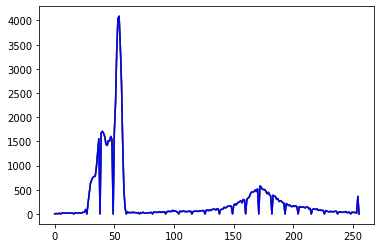

In [244]:
if(len(pic_arr.shape) == 3):

    histogram=np.zeros((3,256))


    ##CODE TO CALCULATE RED, BLUE AND GREEN CHANNEL HISTOGRAM AT THE SAME TIME

    for channel in range(0, 3):
        for i in range(0, height):
            for j in range(0, width):
                a = pic_arr[i][j][channel] - 1
                histogram[channel][a] = histogram[channel][a] + 1

    plt.plot(histogram[0],color = "r")
    plt.plot(histogram[1],color = "g")
    plt.plot(histogram[2],color = "b")
    plt.show()

else:
    print('No rgb channels')

### Thresholding the image

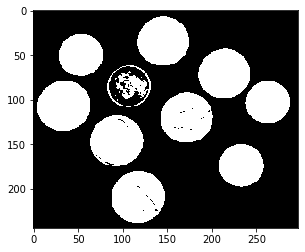

In [245]:
if(len(pic_arr.shape) == 3):

    T=120 #The Threshold

    pic_arr2=pic_arr.copy()

    for channel in range(0,3):   #FOR EVERY CHANNEL (R,G,B)
        for i in range(0,height):   #FOR EVERY ROW   
            for j in range(0,width):   #FOR EVERY COLUMN
                if pic_arr2[i,j,channel]<T: #IF THE PIXELS VALUE IS LESS THAN THE THRESHOLD T
                    pic_arr2[i,j,channel]=0   #SET TO 0
                else:
                    pic_arr2[i,j,channel]=255 #SET TO 255

    plt.imshow(pic_arr2)